In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 22 01:33:30 2021

@author: pmarc
Résolution Problème L12 - #1 par Pierre-Marc Juneau, 22 avril 2021
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
import math


/tmp/ipykernel_173897/1875749733.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('Prix par pied carré', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Prix par pied carré   R-squared:                       0.571
Model:                             OLS   Adj. R-squared:                  0.566
Method:                  Least Squares   F-statistic:                     108.7
Date:                 Thu, 15 Dec 2022   Prob (F-statistic):           9.34e-73
Time:                         14:26:05   Log-Likelihood:                -1492.4
No. Observations:                  414   AIC:                             2997.
Df Residuals:                      408   BIC:                             3021.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Âge de la maison                    -0.2689      0.039     -6.896      0.000      -0.346      -0.192
Distance station transport          -0.0043      0.001     -5.888      0.000      -0.006      -0.003
Nombre de dépanneurs à proximité     1.1630      0.190      6.114      0.000       0.789       1.537
Latitude                           237.7672     44.948      5.290      0.000     149.409     326.126
Longitude                           -7.8055     49.149     -0.159      0.874    -104.422      88.811
const                            -4945.5951   6211.157     -0.796      0.426   -1.72e+04    7264.269
==============================================================================
Omnibus:                      240.068   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3748.747
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      17.114   Cond. No.                     2.35e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

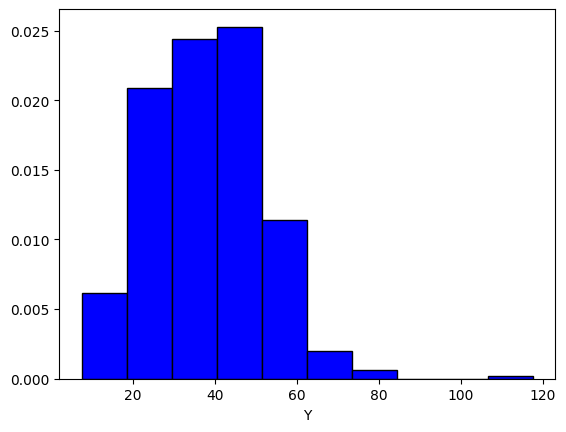

In [2]:

donnee = pd.read_csv('../Fichiers/Immobilierv0r1.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

X=donnee
MatriceR = X.corr()

X=X.drop('Prix par pied carré', 1)
Y=donnee["Prix par pied carré"]


"Estimé de la moyenne et de la variance pour Y"

Y_barre=Y.mean()
s=Y.std()
n=Y.shape[0]

mhu_min=Y_barre-sts.t.isf(0.05/2,n-1)*s/math.sqrt(n)
mhu_max=Y_barre+sts.t.isf(0.05/2,n-1)*s/math.sqrt(n)

Inter_mhu=sts.t.interval(0.95, n-1, loc=Y_barre, scale=s/math.sqrt(n))

sigma_est=s**2
sigma2_min=(n-1)*s**2/sts.chi2.isf(0.05/2,n-1)
sigma_min=math.sqrt(sigma2_min)

sigma2_max=(n-1)*s**2/sts.chi2.isf(1-0.05/2,n-1)
sigma_max=math.sqrt(sigma2_max)

ax=plt.hist(Y,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Y")


"Ronde 1"
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()



In [4]:

"Normalisation"

from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler() 
Xnorm = scalerX.fit_transform(X.values)
scalerY = MinMaxScaler() 
Ynorm = scalerY.fit_transform(Y.values.reshape(-1,1))
Xnorm=pd.DataFrame(Xnorm)
Xnorm.columns=X.columns
Ynorm=pd.DataFrame(Ynorm)
Ynorm.columns=["Prix par pied carré"]

modele=sm.OLS(Ynorm,Xnorm.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(Xnorm.assign(const=1))
resultats.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Prix par pied carré   R-squared:                       0.571
Model:                             OLS   Adj. R-squared:                  0.566
Method:                  Least Squares   F-statistic:                     108.7
Date:                 Thu, 15 Dec 2022   Prob (F-statistic):           9.34e-73
Time:                         14:26:24   Log-Likelihood:                 453.18
No. Observations:                  414   AIC:                            -894.4
Df Residuals:                      408   BIC:                            -870.2
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Âge de la maison                    -0.1072      0.016     -6.896      0.000      -0.138      -0.077
Distance station transport          -0.2505      0.043     -5.888      0.000      -0.334      -0.167
Nombre de dépanneurs à proximité     0.1058      0.017      6.114      0.000       0.072       0.140
Latitude                             0.1785      0.034      5.290      0.000       0.112       0.245
Longitude                           -0.0066      0.041     -0.159      0.874      -0.088       0.075
const                                0.2418      0.040      6.096      0.000       0.164       0.320
==============================================================================
Omnibus:                      240.068   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3748.747
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      17.114   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:

"Standardisation"

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(X.values)
scalerY = StandardScaler() 
Ystand = scalerY.fit_transform(Y.values.reshape(-1,1))
Xstand=pd.DataFrame(Xstand)
Xstand.columns=X.columns
Ystand=pd.DataFrame(Ystand)
Ystand.columns=["Prix par pied carré"]

modele=sm.OLS(Ystand,Xstand.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(Xstand.assign(const=1))
resultats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Prix par pied carré   R-squared:                       0.571
Model:                             OLS   Adj. R-squared:                  0.566
Method:                  Least Squares   F-statistic:                     108.7
Date:                 Thu, 15 Dec 2022   Prob (F-statistic):           9.34e-73
Time:                         14:26:31   Log-Likelihood:                -412.18
No. Observations:                  414   AIC:                             836.4
Df Residuals:                      408   BIC:                             860.5
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Âge de la maison                    -0.2252      0.033     -6.896      0.000      -0.289      -0.161
Distance station transport          -0.3951      0.067     -5.888      0.000      -0.527      -0.263
Nombre de dépanneurs à proximité     0.2518      0.041      6.114      0.000       0.171       0.333
Latitude                             0.2169      0.041      5.290      0.000       0.136       0.297
Longitude                           -0.0088      0.055     -0.159      0.874      -0.118       0.100
const                             -4.33e-14      0.032  -1.34e-12      1.000      -0.064       0.064
==============================================================================
Omnibus:                      240.068   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3748.747
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      17.114   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""